`# This program (Picie Coincide Gate Calculator) is free software: you can redistribute it and/or modify` \
`# it under the terms of the GNU General Public License as published by`\
`# the Free Software Foundation, either version 3 of the License, or`\
`# (at your option) any later version.`\
`# `\
`# This program is distributed in the hope that it will be useful,`\
`# but WITHOUT ANY WARRANTY; without even the implied warranty of`\
`# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the`\
`# GNU General Public License for more details.`\
`# `\
`# You should have received a copy of the GNU General Public License`\
`# along with this program.  If not, see <https://www.gnu.org/licenses/>.`\
`# `\
`# Support and maintenance NOT GUARANTEED`\
`#` \
`### Dr. Miguel Madurga, University of Tennessee (2021)`


# Pixie Coincidence Gate Calculator

It is typically hard to understand Pixie's VANDLE implementation of coincidences. I want to investigate if gate drawing from hard VANDLE gate conditions can help understanding the conditions visually.

NOTE: all values in this program are implicitly `ns`.

## Trigger and Gate conditions

First step is defining:
- VANDLE gate definitions and,
- initial trigger conditions,
- Channel pairwise and global validation windows

In [61]:
using Plots
canvasLow=-200;canvasHigh=1200;
vandleGate=100; betaVandleGate = 500
pairwiseWindow=1000; gWindow=1000; pairwiseDelay=100;globalDelay=200

triggerLeft=0; triggerRight=10; triggerBeta=-120
trigDelayVandle=0; trigDelayBeta=0;

## Successfull trigger plot

We need to plot the triggers at specified values and create gates using `style=:vline` and `style=:hline`

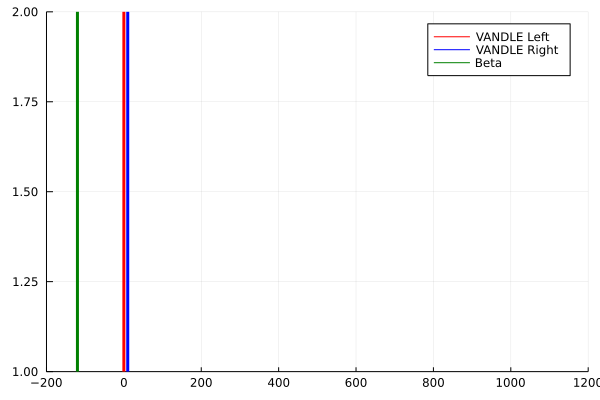

In [62]:
triggersP=plot([],xlims=(canvasLow,canvasHigh),ylims=(0,1.1),label=false)
triggersP=plot([triggerLeft],xlims=(canvasLow,canvasHigh),
seriestype=:vline,linewidth=3,linecolor=:red, label="VANDLE Left")
triggersP=plot!([triggerRight],seriestype=:vline,linewidth=3,linecolor=:blue, label="VANDLE Right")
triggersP=plot!([triggerBeta],seriestype=:vline,linewidth=3,linecolor=:green, label="Beta")


now we can add the gates defined with correct delay from Vandle

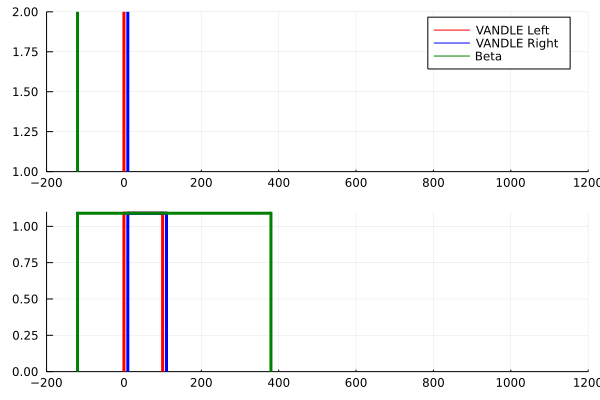

In [63]:
gates=plot([],xlims=(canvasLow,canvasHigh),ylims=(0,1.1),label=false)
gates=plot!([triggerLeft+trigDelayVandle],
seriestype=:vline,linewidth=3,linecolor=:red,labels=false)
gates=plot!([triggerLeft+trigDelayVandle+vandleGate],
seriestype=:vline,linewidth=3,linecolor=:red,labels=false)
gates=plot!([triggerLeft+trigDelayVandle,triggerLeft+trigDelayVandle+vandleGate],[1.09,1.09],
seriestype=:line,linewidth=3,linecolor=:red,labels=false)

gates=plot!([triggerRight+trigDelayVandle],
seriestype=:vline,linewidth=3,linecolor=:blue,labels=false)
gates=plot!([triggerRight+trigDelayVandle+vandleGate],
seriestype=:vline,linewidth=3,linecolor=:blue,labels=false)
gates=plot!([triggerRight+trigDelayVandle,triggerRight+trigDelayVandle+vandleGate],[1.09,1.09],
seriestype=:line,linewidth=3,linecolor=:blue,labels=false)

gates=plot!([triggerBeta],
seriestype=:vline,linewidth=3,linecolor=:green,labels=false)
gates=plot!([triggerBeta+trigDelayBeta+betaVandleGate],
seriestype=:vline,linewidth=3,linecolor=:green,labels=false)
gates=plot!([triggerBeta+trigDelayBeta,triggerBeta+trigDelayVandle+betaVandleGate],[1.09,1.09],
seriestype=:line,linewidth=3,linecolor=:green,labels=false)


plot(triggersP,gates,layout=(2,1))

The final trigger gate is created from the individual gates, defined as the region where all three overlap. That would be the last trigger to the trailing edge of the gate corresponding to the first trigger, so the earliest trailing edge of the gates. 

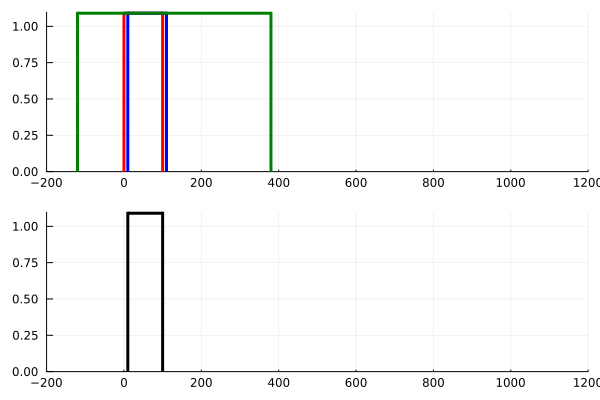

In [64]:
triggers=[triggerBeta+trigDelayBeta,triggerLeft+trigDelayVandle,triggerRight+trigDelayVandle]
gatesEdges=[triggerLeft+trigDelayVandle+vandleGate,triggerRight+trigDelayVandle+vandleGate,
triggerBeta+trigDelayBeta+betaVandleGate]
sort!(triggers)
sort!(gatesEdges)


finalGate=plot([],xlims=(canvasLow,canvasHigh),ylims=(0,1.1),label=false)
finalGate=plot!([triggers[3]],
seriestype=:vline,linewidth=3,linecolor=:black,labels=false)
finalGate=plot!([gatesEdges[1]],
seriestype=:vline,linewidth=3,linecolor=:black,labels=false)
finalGate=plot!([triggers[3],gatesEdges[1]],[1.09,1.09],
seriestype=:line,linewidth=3,linecolor=:black,labels=false)

plot(gates,finalGate,layout=(2,1))
# plot(finalGate)

## Validation Step

Once the trigger window is created channel acquition is validated comparing the local glbal triggers with the validation window started at the initial trigger time. Because some channels are coming at the edge of the global valdiation trigger a delay is required for good overlap. In this example we use the last trigger to showcase why it is necessary

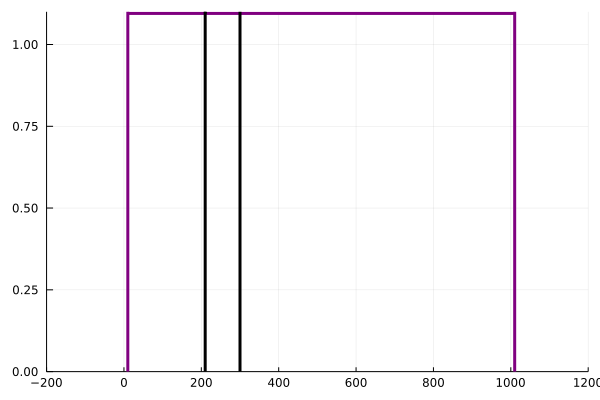

In [65]:
globalWindow=plot([],xlims=(canvasLow,canvasHigh),ylims=(0,1.1),label=false)
globalWindow=plot!([triggers[3]],seriestype=:vline,linewidth=3,linecolor=:purple,labels=false)
globalWindow=plot!([triggers[3]+gWindow],seriestype=:vline,linewidth=3,linecolor=:purple,labels=false)
globalWindow=plot!([triggers[3],triggers[3]+gWindow],[1.095,1.095],linewidth=3,seriestype=:line,linecolor=:purple,labels=false)

# finalGateV=plot([],xlims=(canvasLow,canvasHigh),ylims=(0,1.1),label=false)
globalWindow=plot!([triggers[3]+globalDelay],
seriestype=:vline,linewidth=3,linecolor=:black,labels=false)
globalWindow=plot!([gatesEdges[1]+globalDelay],
seriestype=:vline,linewidth=3,linecolor=:black,labels=false)
globalWindow=plot!([triggers[3]+globalDelay,gatesEdges[1]+globalDelay],[1.095,1.95],
seriestype=:line,linewidth=3,linecolor=:black,labels=false)



# # Putting Everyting together

Now we can plot how we go from triggers, to gates, to validation

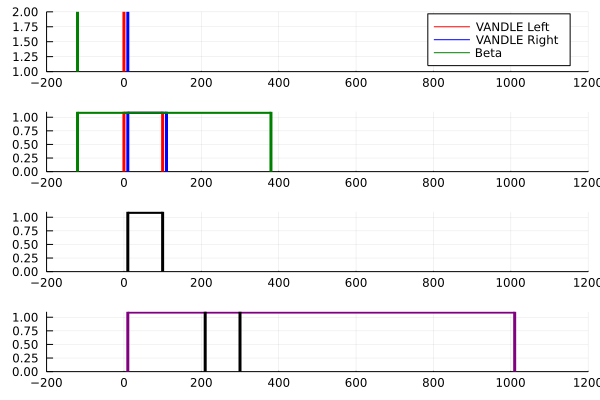

In [66]:
plot(triggersP,gates,finalGate,globalWindow,layout=(4,1))